<a href="https://colab.research.google.com/github/sigolyori/my-little-projects/blob/main/20250328_Garmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install garminconnect

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum  # 나눔 폰트 설치
!sudo fc-cache -fv  # 폰트 캐시 업데이트
!rm ~/.cache/matplotlib -rf  # matplotlib 캐시 삭제

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')  # 사용할 한글 폰트 지정 (나눔바른고딕)

# Background
날씨가 추워지면 운동량이 줄어드는 것이 느껴진다. 운동량이 줄어드는 것은 여러 측면에서 부정적인 영향을 미친다. 회사 업무 후 운동을 하지 않으면 활력이 저하된다. 또한 깊은 수면에 빠지지 않게 되는 경향이 있다. 수면 질 저하는 정신적 스트레스를 유발할 수 있다.

또한 운동 부족은 자신감의 하락으로 이어진다. 운동을 통해 자신에게 투자하고 관리한다는 느낌을 받지만, 운동을 하지 않으면 점점 몸이 좋지 않아진다는 느낌을 받게 된다.

주로 야외에서 달리기를 하므로 운동량은 날씨에 큰 영향을 받는다. 나는 매일 가민 스마트워치를 착용하여 운동량을 측정하고 있다. 이 데이터를 바탕으로 운동량과 날씨의 상관관계를 분석하고자 한다.

# Problem Definition(Hypotheses)
기온이 5도 이하로 떨어지면 야외 달리기를 하지 않는다.

# Data
가민 데이터 + 기상청 기온

# Method
시각화 및 상관분석 수행

# Result
Highly correlated

# Lessons & Learned
날씨가 추워질 때는 야외 달리기를 대체할만한 운동을 찾아야 함. 이를 통해 운동량 저하로 인해 찾아올 수 있는 부작용을 방지할 수 있음

# Code

In [ ]:
from garminconnect import Garmin
from google.colab import userdata
import datetime
import pandas as pd

# Google Colab 사용자 데이터에서 가민 커넥트 로그인 정보 가져오기
EMAIL = userdata.get('GARMIN_EMAIL')
PASSWORD = userdata.get('GARMIN_PASSWORD')

# 가민 커넥트 객체 생성 및 로그인
try:
    api = Garmin(EMAIL, PASSWORD)
    api.login()

    # 결과를 저장할 DataFrame 생성
    results = []

    # 가져올 데이터의 날짜 범위 설정 (예: 최근 7일)
    today = datetime.date.today()
    for i in range(180):
        date = today - datetime.timedelta(days=i)
        # 날짜를 Garmin Connect API 형식으로 변환 (YYYY-MM-DD)
        date_str = date.strftime('%Y-%m-%d')

        # 해당 날짜의 활동 데이터 가져오기
        activities = api.get_activities_by_date(date_str, date_str, 0, 10)  # 최대 10개의 활동 가져오기

        if activities:
            total_duration = 0  # 해당 날짜의 총 운동 시간 초기화
            for activity in activities:
                # 운동 시간 (초) 추출 및 누적
                duration = activity.get('duration')
                if duration:
                    total_duration += duration

            # 총 운동 시간 (분)으로 변환
            minutes = (total_duration // 60)

            results.append({'날짜': date_str, '운동시간 (분)': minutes})
        else:
            results.append({'날짜': date_str, '운동시간 (분)': 0})  # 활동 데이터가 없는 경우 0으로 설정

    # DataFrame 생성 및 출력
    df = pd.DataFrame(results)
    print(df)

except Exception as e:
    print(f"오류 발생: {e}")

2025-03-28
2025-03-27
2025-03-26
2025-03-25
2025-03-24
2025-03-23
2025-03-22
2025-03-21
2025-03-20
2025-03-19
2025-03-18
2025-03-17
2025-03-16
2025-03-15
2025-03-14
2025-03-13
2025-03-12
2025-03-11
2025-03-10
2025-03-09
2025-03-08
2025-03-07
2025-03-06
2025-03-05
2025-03-04
2025-03-03
2025-03-02
2025-03-01
2025-02-28
2025-02-27
2025-02-26
2025-02-25
2025-02-24
2025-02-23
2025-02-22
2025-02-21
2025-02-20
2025-02-19
2025-02-18
2025-02-17
2025-02-16
2025-02-15
2025-02-14
2025-02-13
2025-02-12
2025-02-11
2025-02-10
2025-02-09
2025-02-08
2025-02-07
2025-02-06
2025-02-05
2025-02-04
2025-02-03
2025-02-02
2025-02-01
2025-01-31
2025-01-30
2025-01-29
2025-01-28
2025-01-27
2025-01-26
2025-01-25
2025-01-24
2025-01-23
2025-01-22
2025-01-21
2025-01-20
2025-01-19
2025-01-18
2025-01-17
2025-01-16
2025-01-15
2025-01-14
2025-01-13
2025-01-12
2025-01-11
2025-01-10
2025-01-09
2025-01-08
2025-01-07
2025-01-06
2025-01-05
2025-01-04
2025-01-03
2025-01-02
2025-01-01
2024-12-31
2024-12-30
2024-12-29
2024-12-28

In [ ]:
import matplotlib.pyplot as plt

# 날짜를 datetime 형식으로 변환하고 인덱스로 설정
df['날짜'] = pd.to_datetime(df['날짜'])
df.set_index('날짜', inplace=True)

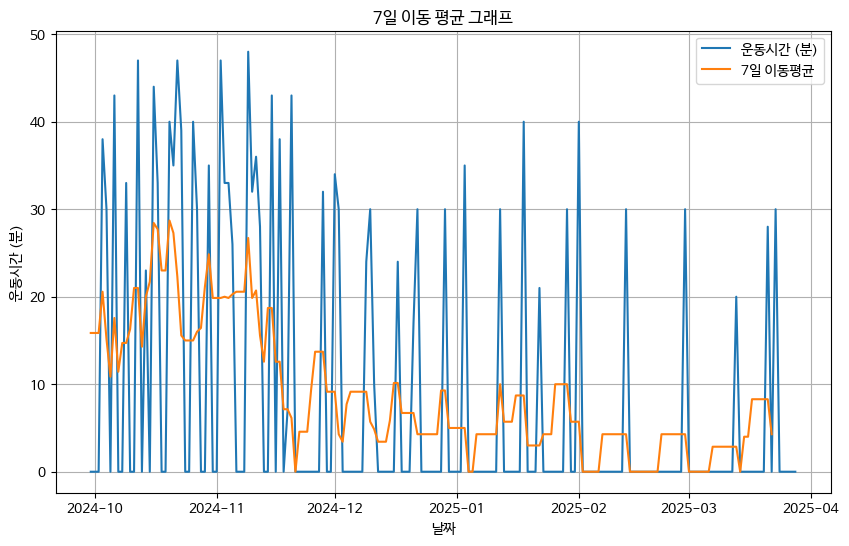

In [ ]:
# 7일 이동 평균 계산
df['운동시간 (분) 7일 이동평균'] = df['운동시간 (분)'].rolling(window=7).mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df['운동시간 (분)'], label='운동시간 (분)')
plt.plot(df['운동시간 (분) 7일 이동평균'], label='7일 이동평균')
plt.title('7일 이동 평균 그래프')
plt.xlabel('날짜')
plt.ylabel('운동시간 (분)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
file_path = '/content/drive/My Drive/700. 프로젝트/740. 데이터분석/01. Garmin/01. data/20250328_2024-2025-서울시기온.csv'  # 실제 파일 경로로 수정

In [ ]:
temperature_df = pd.read_csv(file_path, encoding='cp949')
temperature_df = temperature_df[['일시', '평균기온(℃)']]
temperature_df.columns = ['날짜', '평균기온']
temperature_df['날짜'] = pd.to_datetime(temperature_df['날짜'])
temperature_df.set_index('날짜', inplace=True)
start_date = pd.to_datetime('2024-09-01')
filtered_temperature_df = temperature_df[temperature_df.index >= start_date]
# DataFrame 확인
print(filtered_temperature_df.head())

            평균기온
날짜              
2024-09-01  27.1
2024-09-02  24.5
2024-09-03  27.0
2024-09-04  27.9
2024-09-05  26.3


<ipython-input-23-0af9f1908276>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temperature_df['날짜'] = pd.to_datetime(temperature_df['날짜'])


<ipython-input-24-51f810bfd0c5>:18: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.tight_layout()  # 레이아웃 조정
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


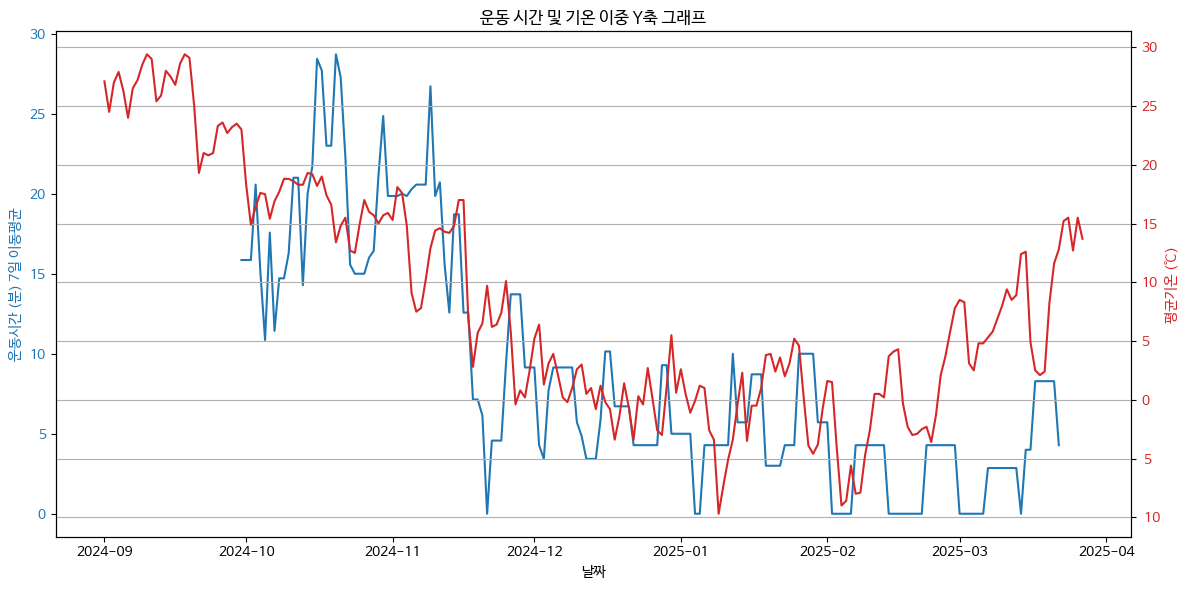

In [ ]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('날짜')
ax1.set_ylabel('운동시간 (분) 7일 이동평균', color=color)
ax1.plot(df.index, df['운동시간 (분) 7일 이동평균'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # 두 번째 y축 공유

color = 'tab:red'
ax2.set_ylabel('평균기온 (℃)', color=color)
ax2.plot(filtered_temperature_df.index, filtered_temperature_df['평균기온'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('운동 시간 및 기온 이중 Y축 그래프')
fig.tight_layout()  # 레이아웃 조정
plt.grid(True)
plt.show()